In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataPath = "/home/maarten/Documents/doctoraat/code/incremunica-evaluation/data.csv"
df = pd.read_csv(dataPath);

In [3]:
df.head()

,joinAlgorithm,datasetName,matchTransformPercentage,scenarioName,operationName,isTransformation,transformationNr,amountOfAdditions,amountOfDeletions,queryTime(seconds),queryTime(nanoseconds),memoryUsed
0,computational-bind-join,inject-1,30,PosLength,batch pos length,False,0,12,0,0.0,697662186.8,231830112.0
1,computational-bind-join,inject-1,30,PosLength,batch pos length,False,1,132,12,0.0,58203716.2,247745348.8
2,computational-bind-join,inject-1,30,PosLength,batch pos length,False,2,8,8,0.0,83454266.6,248459547.2
3,computational-bind-join,inject-1,30,PosLength,batch pos length,False,3,8,8,0.0,100063019.0,251638795.2
4,computational-bind-join,inject-1,30,PosLength,batch pos length,False,4,8,8,0.0,128391983.4,258558400.0


In [4]:
# select the rows where joinAlgorithm is computational-bind-join or memory-bind-join
hashJoinsDf = df[df['joinAlgorithm'].isin(['partial-hash-join', 'full-hash-join'])]

hashJoinsDf.head()

,joinAlgorithm,datasetName,matchTransformPercentage,scenarioName,operationName,isTransformation,transformationNr,amountOfAdditions,amountOfDeletions,queryTime(seconds),queryTime(nanoseconds),memoryUsed
432,full-hash-join,batch-1,30,PosLength,batch pos length,False,0,0,0,0.0,112285.4,220222043.2
433,full-hash-join,batch-1,30,PosLength,batch pos length,False,1,118,0,0.0,104432158.6,224478248.0
434,full-hash-join,batch-1,30,PosLength,batch pos length,False,2,0,0,0.0,23493.0,231551216.0
435,full-hash-join,batch-1,30,PosLength,batch pos length,False,3,0,0,0.0,53701.0,233103644.8
436,full-hash-join,batch-1,30,PosLength,batch pos length,False,4,0,0,0.0,17497.8,235206012.8


/tmp/ipykernel_43073/775159938.py:14: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in newDf.groupby(['joinAlgorithm']):


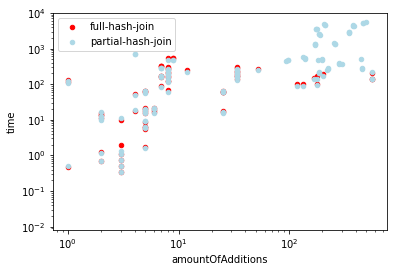

/tmp/ipykernel_43073/775159938.py:24: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in newDf.groupby(['joinAlgorithm']):


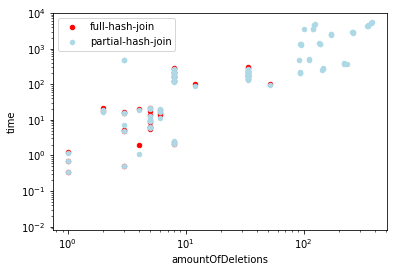

/tmp/ipykernel_43073/775159938.py:34: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in newDf.groupby(['joinAlgorithm']):


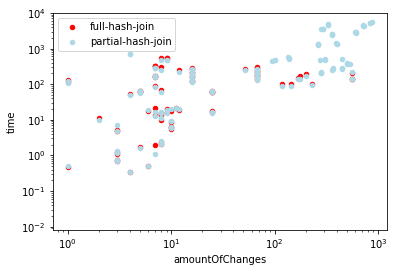

/tmp/ipykernel_43073/775159938.py:44: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in newDf.groupby(['joinAlgorithm']):


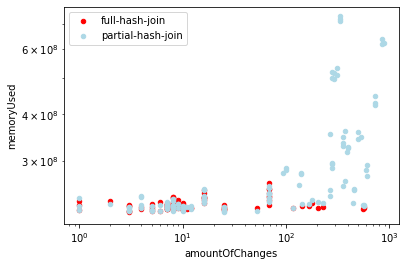

In [5]:
# make a graph where the x-axis has the amount of changes (amountOfAdditions + amountOfDeletions) and the y-axis has the time (queryTime(seconds) * 1000 + queryTime(nanoseconds)/1000)
newDf = pd.DataFrame()
newDf['joinAlgorithm'] = hashJoinsDf['joinAlgorithm']
newDf['amountOfAdditions'] = hashJoinsDf['amountOfAdditions']
newDf['amountOfDeletions'] = hashJoinsDf['amountOfDeletions']
newDf['amountOfAdditions'] = hashJoinsDf['amountOfAdditions']
newDf['amountOfChanges'] = hashJoinsDf['amountOfDeletions'] + hashJoinsDf['amountOfAdditions']
newDf['time'] = hashJoinsDf['queryTime(seconds)'] * 1000 + hashJoinsDf['queryTime(nanoseconds)']/1000000
newDf['memoryUsed'] = hashJoinsDf['memoryUsed']
newDf.head()

#plot for different join algorithms
fig, ax = plt.subplots()
for key, grp in newDf.groupby(['joinAlgorithm']):
    color = 'lightblue'
    if key == 'full-hash-join':
        color = 'red'
    ax = grp.plot(ax=ax, kind='scatter', x='amountOfAdditions', y='time', label=key, color=color)
plt.yscale('log')
plt.xscale('log')
plt.show()

fig, ax = plt.subplots()
for key, grp in newDf.groupby(['joinAlgorithm']):
    color = 'lightblue'
    if key == 'full-hash-join':
        color = 'red'
    ax = grp.plot(ax=ax, kind='scatter', x='amountOfDeletions', y='time', label=key, color=color)
plt.yscale('log')
plt.xscale('log')
plt.show()

fig, ax = plt.subplots()
for key, grp in newDf.groupby(['joinAlgorithm']):
    color = 'lightblue'
    if key == 'full-hash-join':
        color = 'red'
    ax = grp.plot(ax=ax, kind='scatter', x='amountOfChanges', y='time', label=key, color=color)
plt.yscale('log')
plt.xscale('log')
plt.show()

fig, ax = plt.subplots()
for key, grp in newDf.groupby(['joinAlgorithm']):
    color = 'lightblue'
    if key == 'full-hash-join':
        color = 'red'
    ax = grp.plot(ax=ax, kind='scatter', x='amountOfChanges', y='memoryUsed', label=key, color=color)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [16]:
hashJoinsDf['queryTime(ms)'] = hashJoinsDf['queryTime(seconds)'] * 1000 + hashJoinsDf['queryTime(nanoseconds)']/1000000

/tmp/ipykernel_43073/3762320439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hashJoinsDf['queryTime(ms)'] = hashJoinsDf['queryTime(seconds)'] * 1000 + hashJoinsDf['queryTime(nanoseconds)']/1000000


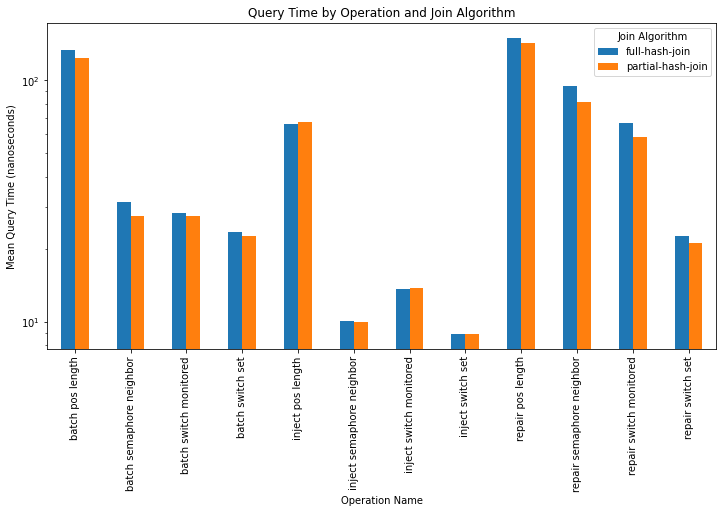

In [59]:
data = hashJoinsDf[hashJoinsDf['scenarioName'].isin(['PosLength', 'RouteSensor', 'SemaphoreNeighbor', 'SwitchMonitored', 'SwitchSet'])]
grouped_data = data.groupby(['operationName', 'joinAlgorithm'])['queryTime(ms)'].mean().unstack()

# Create the bar graph with bars for different joinAlgorithms next to each other
ax = grouped_data.plot(kind='bar', figsize=(12, 6,))

# Customize the plot
plt.xlabel('Operation Name')
plt.ylabel('Mean Query Time (nanoseconds)')
plt.title('Query Time by Operation and Join Algorithm')
plt.legend(title='Join Algorithm', loc='upper right')
plt.yscale('log')
plt.show()

In [27]:
# select rows where datasetName is equal to 'batch-1'
batch1Df = hashJoinsDf[hashJoinsDf['datasetName'].isin(['batch-1'])]
inject1Df = hashJoinsDf[hashJoinsDf['datasetName'].isin(['inject-1'])]
repair1Df = hashJoinsDf[hashJoinsDf['datasetName'].isin(['repair-1'])]

batch1_grouped_data = batch1Df.groupby(['operationName', 'joinAlgorithm'])['queryTime(ms)'].mean().unstack()
inject1_grouped_data = inject1Df.groupby(['operationName', 'joinAlgorithm'])['queryTime(ms)'].mean().unstack()
repair1_grouped_data = repair1Df.groupby(['operationName', 'joinAlgorithm'])['queryTime(ms)'].mean().unstack()

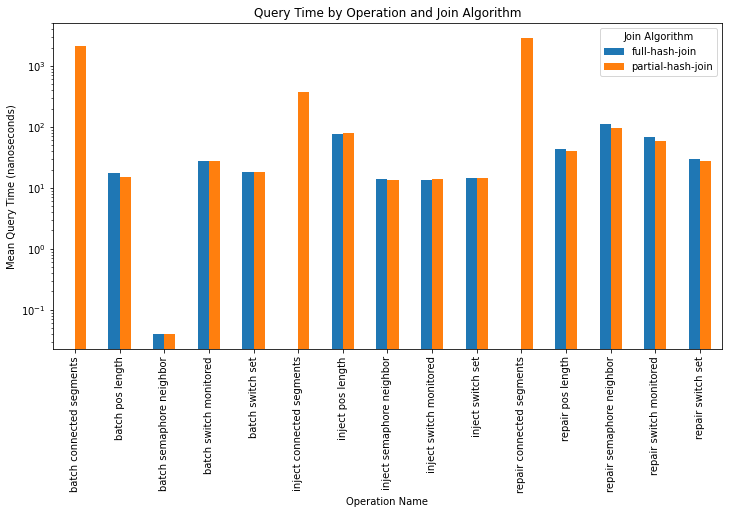

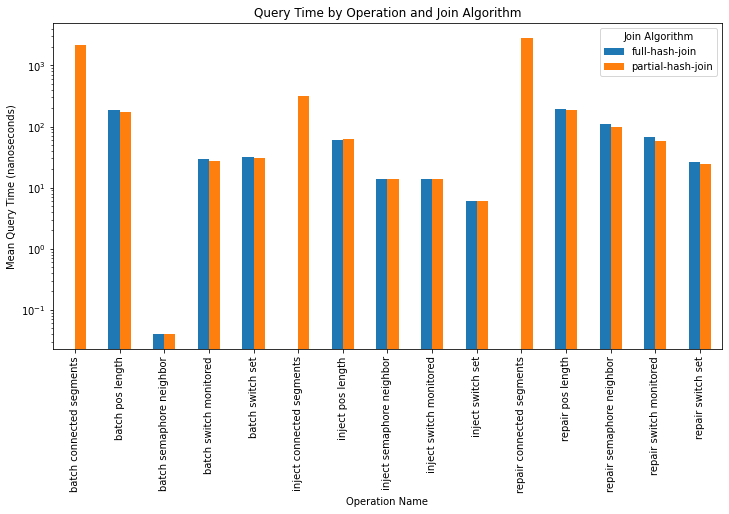

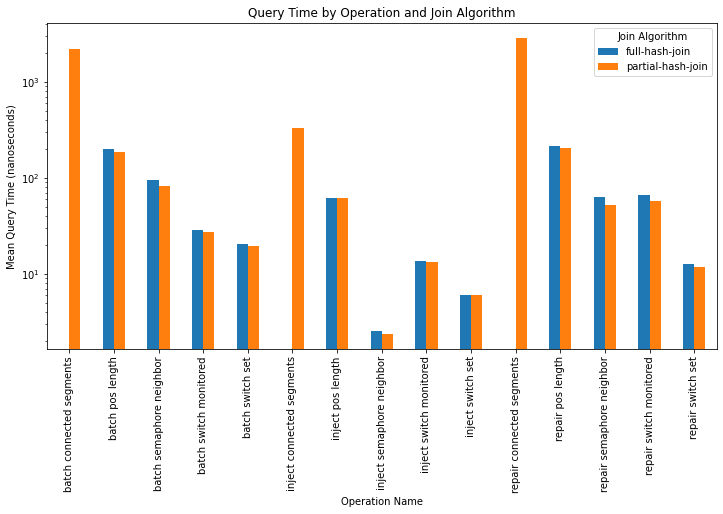

In [24]:
# Create the bar graph with bars for different joinAlgorithms next to each other
ax = batch1_grouped_data.plot(kind='bar', figsize=(12, 6,))

# Customize the plot
plt.xlabel('Operation Name')
plt.ylabel('Mean Query Time (nanoseconds)')
plt.title('Query Time by Operation and Join Algorithm')
plt.legend(title='Join Algorithm', loc='upper right')
plt.yscale('log')
plt.show()

# Create the bar graph with bars for different joinAlgorithms next to each other
ax = inject1_grouped_data.plot(kind='bar', figsize=(12, 6,))

# Customize the plot
plt.xlabel('Operation Name')
plt.ylabel('Mean Query Time (nanoseconds)')
plt.title('Query Time by Operation and Join Algorithm')
plt.legend(title='Join Algorithm', loc='upper right')
plt.yscale('log')
plt.show()

# Create the bar graph with bars for different joinAlgorithms next to each other
ax = repair1_grouped_data.plot(kind='bar', figsize=(12, 6,))

# Customize the plot
plt.xlabel('Operation Name')
plt.ylabel('Mean Query Time (nanoseconds)')
plt.title('Query Time by Operation and Join Algorithm')
plt.legend(title='Join Algorithm', loc='upper right')
plt.yscale('log')
plt.show()

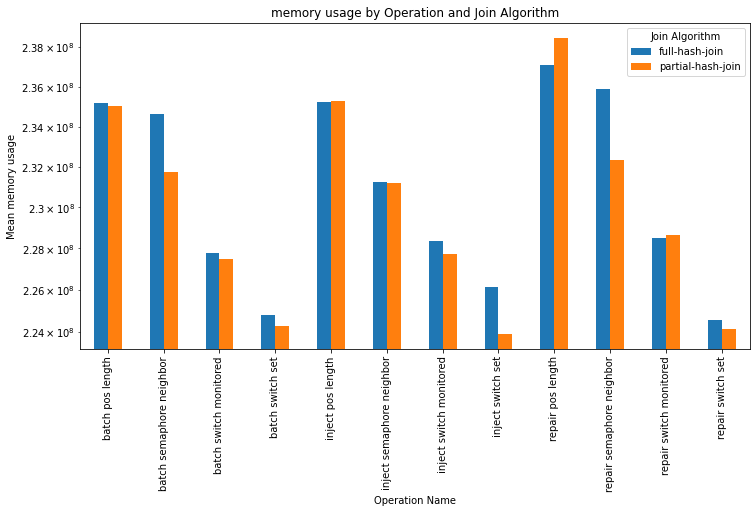

In [47]:
data = hashJoinsDf[hashJoinsDf['scenarioName'].isin(['PosLength', 'RouteSensor', 'SemaphoreNeighbor', 'SwitchMonitored', 'SwitchSet'])]
grouped_data = data.groupby(['operationName', 'joinAlgorithm'])['memoryUsed'].mean().unstack()

# Create the bar graph with bars for different joinAlgorithms next to each other
ax = grouped_data.plot(kind='bar', figsize=(12, 6,))

# Customize the plot
plt.xlabel('Operation Name')
plt.ylabel('Mean memory usage')
plt.title('memory usage by Operation and Join Algorithm')
plt.legend(title='Join Algorithm', loc='upper right')
plt.yscale('log')
plt.show()

/tmp/ipykernel_43073/1333069875.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[hashJoinsDf['amountOfAdditions'] < hashJoinsDf['amountOfDeletions']]


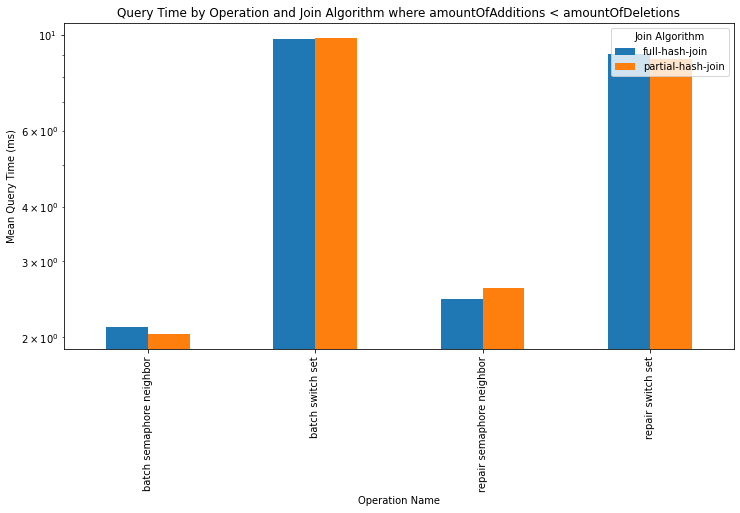

In [63]:
data = hashJoinsDf[hashJoinsDf['scenarioName'].isin(['PosLength', 'RouteSensor', 'SemaphoreNeighbor', 'SwitchMonitored', 'SwitchSet'])]

#select rows where 'amountOfAdditions' is smaller than 'amountOfDeletions'
data = data[hashJoinsDf['amountOfAdditions'] < hashJoinsDf['amountOfDeletions']]
grouped_data = data.groupby(['operationName', 'joinAlgorithm'])['queryTime(ms)'].mean().unstack()

# Create the bar graph with bars for different joinAlgorithms next to each other
ax = grouped_data.plot(kind='bar', figsize=(12, 6,))

# Customize the plot
plt.xlabel('Operation Name')
plt.ylabel('Mean Query Time (ms)')
plt.title('Query Time by Operation and Join Algorithm where amountOfAdditions < amountOfDeletions')
plt.legend(title='Join Algorithm', loc='upper right')
plt.yscale('log')
plt.show()